In [11]:
import sys, os
src = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(src)


In [12]:
from src.audio.audio_extract import *
import numpy as np
from src.load_data import *
transcr_path = '../paco-cheese/transcr'
data = load_all_ipus(folder_path=transcr_path, load_words=False)
    
audio_files_path = '../paco-cheese/audio/2_channels/'
audio_segments = extract_audio_segments(data, audio_files_path)
premier_audio_segment = audio_segments[5]  

data[:10]

,ipu_id,speaker,start,stop,text,is_main_speaker,turn_at_start,turn_after,turn_start_word,yield_at_end,request_at_start,dyad
0,0,AA,4.54,4.840,tu as,True,False,True,4.84,True,False,transcr\AAOR
1,1,OR,5.14,5.825,mh ouais si tu veux,True,True,False,NaN,False,True,transcr\AAOR
2,2,OR,6.62,7.010,frog joke,True,False,False,NaN,False,False,transcr\AAOR
3,3,OR,7.42,10.870,un jour un ingénieur traversait la rue quand u...,True,False,False,NaN,False,False,transcr\AAOR
4,4,OR,11.36,13.835,si tu m'embrasses je me transforme en belle pr...,True,False,False,NaN,False,False,transcr\AAOR
5,5,OR,14.42,17.243,il s'accroupit ramassa la grenouille et la mit...,True,False,False,NaN,False,False,transcr\AAOR
6,6,OR,17.68,19.815,la grenouille reprit la parole et dit si tu m'...,True,False,False,NaN,False,False,transcr\AAOR
7,7,OR,20.04,21.230,et me tranformes en belle princesse,True,False,False,NaN,False,False,transcr\AAOR
8,8,OR,21.54,22.665,je resterai avec toi une semaine,True,False,False,NaN,False,False,transcr\AAOR
9,9,OR,23.50,25.680,l'ingénieur sortit la grenouille de sa poche,True,False,False,NaN,False,False,transcr\AAOR


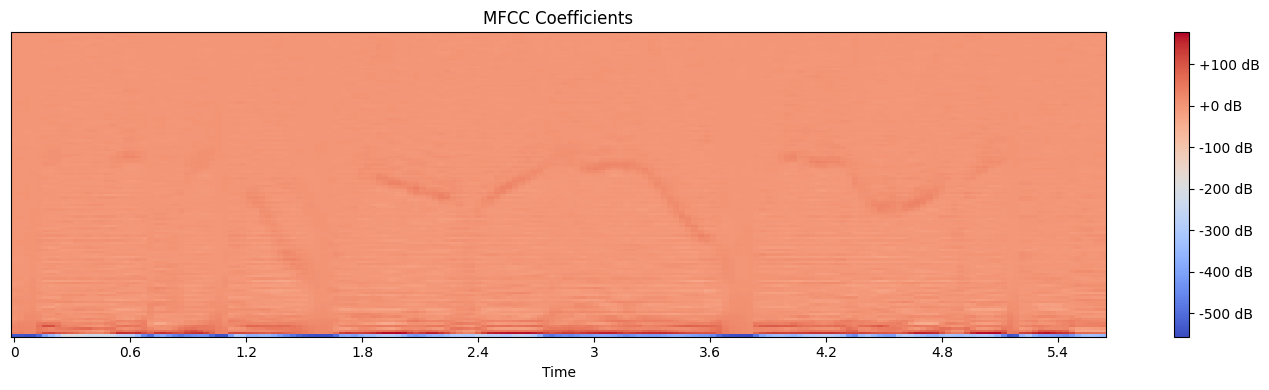

In [10]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

def extract_features(audio_segment):
    """
    Extrait les caractéristiques (MFCC) d'un segment audio.

    Paramètres:
        audio_segment (AudioSegment): Le segment audio à partir duquel extraire les caractéristiques.

    Retourne:
        np.ndarray: Vecteur des moyennes des MFCCs du segment audio.
    """
    # Convertir l'AudioSegment en un array numpy
    samples = np.array(audio_segment.get_array_of_samples())

    # Normaliser les samples en fonction de la largeur de l'échantillon
    if audio_segment.sample_width == 2:
        samples = samples.astype(np.float32) / 32768
    elif audio_segment.sample_width == 4:
        samples = samples.astype(np.float32) / 2147483648

    # Extraire les MFCCs en utilisant librosa
    mfccs = librosa.feature.mfcc(y=samples, sr=audio_segment.frame_rate, n_mfcc=128)
    
    # Calculer la moyenne des MFCCs pour chaque coefficient
    mfccs_mean = np.mean(mfccs, axis=1)
    plt.figure(figsize=(14, 4))  # La taille de l'image sera ajustée pour ressembler à celle fournie
    librosa.display.specshow(mfccs, sr=audio_segment.frame_rate, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    
    plt.title('MFCC Coefficients')
    plt.tight_layout()
    plt.show()
    
    return mfccs

    
mfccs=extract_features(premier_audio_segment)

(128,)


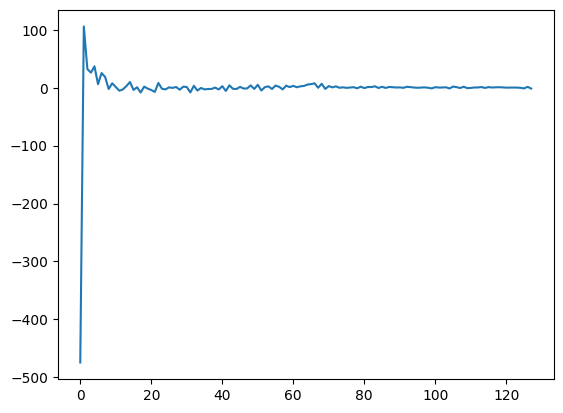